In [1]:
import pandas as pd
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, average_precision_score, mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr

import numpy as np

# preds

# Load the training set of meta-model
ct_chemberta2_valid2 = pd.read_csv('./chemberta2/results/clintox/chemberta2_valid2_clintox_3_predictions.csv')
ct_molformer_valid2 = pd.read_csv('./molformer/results/clintox/molformer_valid2_clintox_3_epoch26.csv')
ct_molbert_valid2 = pd.read_csv('./molbert/results/cilntox/molbert_valid2_clintox_3.csv')

# Load the test data for each model
ct_chemberta2_test = pd.read_csv('./chemberta2/results/clintox/chemberta2_test_clintox_3_predictions.csv')
ct_molformer_test = pd.read_csv('./molformer/results/clintox/molformer_test_clintox_3_epoch26.csv')
ct_molbert_test = pd.read_csv('./molbert/results/cilntox/molbert_test_clintox_3.csv')

# Load the training set of meta-model
lipo_chemberta2_valid2 = pd.read_csv('./chemberta2/results/lipo/chemberta2_valid2_lipo_3_predictions.csv')
lipo_molformer_valid2 = pd.read_csv('./molformer/results/lipo/molformer_valid2_lipo_3.csv')
lipo_molbert_valid2 = pd.read_csv('./molbert/results/lipo/molbert_valid2_lipo_3.csv')

# Load the test data for each model
lipo_chemberta2_test = pd.read_csv('./chemberta2/results/lipo/chemberta2_test_lipo_3_predictions.csv')
lipo_molformer_test = pd.read_csv('./molformer/results/lipo/molformer_test_lipo_3.csv')
lipo_molbert_test = pd.read_csv('./molbert/results/lipo/molbert_test_lipo_3.csv')

train_mean = 2.1720992063492064
train_sd = 1.201255528709618

# features

# Load the features from chemberta
ct_chemberta2_features_valid2 = pd.read_csv('./chemberta2/features/clintox/chemberta2_valid2_clintox_3_features.csv')
ct_chemberta2_features_test = pd.read_csv('./chemberta2/features/clintox/chemberta2_test_clintox_3_features.csv')

lipo_chemberta2_features_valid2 = pd.read_csv('./chemberta2/features/lipo/chemberta2_valid2_lipo_3_features.csv')
lipo_chemberta2_features_test = pd.read_csv('./chemberta2/features/lipo/chemberta2_test_lipo_3_features.csv')

# Load the features from molformer
ct_molformer_features_valid2 = pd.read_csv('./molformer/features/clintox/molformer_valid2_clintox_3_features.csv')
ct_molformer_features_test = pd.read_csv('./molformer/features/clintox/molformer_test_clintox_3_features.csv')

lipo_molformer_features_valid2 = pd.read_csv('./molformer/features/lipo/molformer_valid2_lipo_3_features.csv')
lipo_molformer_features_test = pd.read_csv('./molformer/features/lipo/molformer_test_lipo_3_features.csv')

# Load the features from molbert
ct_molbert_features_valid2 = pd.read_csv('./molbert/features/clintox/molbert_valid2_clintox_3_features.csv')
ct_molbert_features_test = pd.read_csv('./molbert/features/clintox/molbert_test_clintox_3_features.csv')

lipo_molbert_features_valid2 = pd.read_csv('./molbert/features/lipo/molbert_valid2_lipo_3_features.csv')
lipo_molbert_features_test = pd.read_csv('./molbert/features/lipo/molbert_test_lipo_3_features.csv')

For Clintox (Classification)

In [45]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score

# Preparing the actual and predicted values
# Chemberta2
ct_chemberta_actual = ct_chemberta2_test['CT_TOX']
ct_chemberta_pred = ct_chemberta2_test['y_pred']
ct_chemberta_probs = ct_chemberta2_test[['softmax_class_0_prob', 'softmax_class_1_prob']]

# Molformer
ct_molformer_actual = ct_molformer_test['Actual']
ct_molformer_pred = (ct_molformer_test['Prob_Class_1'] > 0.5).astype(int)
ct_molformer_probs = ct_molformer_test[['Prob_Class_0', 'Prob_Class_1']]

# Molbert
ct_molbert_actual = ct_molbert_test['target']
ct_molbert_pred = ct_molbert_test['pred']
ct_molbert_probs = ct_molbert_test['prob']

# Calculating metrics
ct_metrics_results = {}

for model_name, actual, pred, probs in [("Chemberta2", ct_chemberta_actual, ct_chemberta_pred, ct_chemberta_probs['softmax_class_1_prob']),
                                         ("Molformer", ct_molformer_actual, ct_molformer_pred, ct_molformer_probs['Prob_Class_1']),
                                         ("Molbert", ct_molbert_actual, ct_molbert_pred, ct_molbert_probs)]:
    ct_metrics_results[model_name] = {
        "Accuracy": accuracy_score(actual, pred),
        "F1 Score": f1_score(actual, pred),
        "ROC-AUC": roc_auc_score(actual, probs),
        "PR-AUC": average_precision_score(actual, probs)
    }

ct_metrics_results

{'Chemberta2': {'Accuracy': 0.9731543624161074,
  'F1 Score': 0.8,
  'ROC-AUC': 0.9964028776978417,
  'PR-AUC': 0.9540404040404039},
 'Molformer': {'Accuracy': 0.9328859060402684,
  'F1 Score': 0.375,
  'ROC-AUC': 0.9266187050359712,
  'PR-AUC': 0.5340980864486556},
 'Molbert': {'Accuracy': 0.9172413793103448,
  'F1 Score': 0.14285714285714285,
  'ROC-AUC': 0.9133333333333333,
  'PR-AUC': 0.46665875863902184}}

In [46]:
# Determine the 'smiles' values in chemberta that are not in molbert
missing_smiles = set(ct_chemberta2_valid2['smiles']) - set(ct_molbert_valid2['smiles'])

# Find the indices of these missing 'smiles' in the chemberta DataFrame
missing_indices = ct_chemberta2_valid2.index[ct_chemberta2_valid2['smiles'].isin(missing_smiles)].tolist()

# Drop the rows with these missing indices for chemberta and molformer
ct_chemberta2_valid2 = ct_chemberta2_valid2.drop(missing_indices)
ct_molformer_valid2 = ct_molformer_valid2.drop(missing_indices)
ct_chemberta2_features_valid2 = ct_chemberta2_features_valid2.drop(missing_indices)
ct_molformer_features_valid2 = ct_molformer_features_valid2.drop(missing_indices)
ct_molbert_features_valid2 = ct_molbert_features_valid2.drop(missing_indices)

# do the same for test sets
missing_smiles = set(ct_chemberta2_test['smiles']) - set(ct_molbert_test['smiles'])
missing_indices = ct_chemberta2_test.index[ct_chemberta2_test['smiles'].isin(missing_smiles)].tolist()

ct_chemberta2_test = ct_chemberta2_test.drop(missing_indices)
ct_molformer_test = ct_molformer_test.drop(missing_indices)
ct_chemberta2_features_test = ct_chemberta2_features_test.drop(missing_indices)
ct_molformer_features_test = ct_molformer_features_test.drop(missing_indices)
ct_molbert_features_test = ct_molbert_features_test.drop(missing_indices)

In [2]:
# check shapes
print(ct_chemberta2_valid2.shape)
print(ct_molformer_valid2.shape)
print(ct_molbert_valid2.shape)
print(ct_chemberta2_features_valid2.shape)
print(ct_molformer_features_valid2.shape)
print(ct_molbert_features_valid2.shape)

(297, 8)
(297, 5)
(295, 4)
(297, 386)
(297, 769)
(297, 769)


In [3]:
# check shapes
print(ct_chemberta2_test.shape)
print(ct_molformer_test.shape)
print(ct_molbert_test.shape)
print(ct_chemberta2_features_test.shape)
print(ct_molformer_features_test.shape)
print(ct_molbert_features_test.shape)

(149, 8)
(149, 5)
(145, 4)
(149, 386)
(149, 769)
(149, 769)


In [48]:
# create a new dataframe with one column of ct_chemberta2_valid2['softmax_class_1_prob']
ct_chemberta2_prob = pd.DataFrame({'chemberta2': ct_chemberta2_valid2['softmax_class_1_prob']})
ct_chemberta2_prob.reset_index(drop=True, inplace=True)

# create a new dataframe with one column of ct_molformer_valid2['Prob_Class_1']
ct_molformer_prob = pd.DataFrame({'molformer': ct_molformer_valid2['Prob_Class_1']})
ct_molformer_prob.reset_index(drop=True, inplace=True)

# create a new dataframe with one column of ct_molbert_valid2['Probabilities']
ct_molbert_prob = pd.DataFrame({'molbert': ct_molbert_valid2['prob']})
ct_molbert_prob.reset_index(drop=True, inplace=True)

# concatenate the three dataframes
ct_prob = pd.concat([ct_chemberta2_prob, ct_molformer_prob, ct_molbert_prob], axis=1)

# do the same for features ct_chemberta2_features_valid2.iloc[:, 2:]
ct_chemberta2_features = pd.DataFrame(ct_chemberta2_features_valid2.iloc[:, 2:])
ct_chemberta2_features.reset_index(drop=True, inplace=True)
ct_molformer_features = pd.DataFrame(ct_molformer_features_valid2.iloc[:, 2:])
ct_molformer_features.reset_index(drop=True, inplace=True)
ct_molbert_features = pd.DataFrame(ct_molbert_features_valid2.iloc[:, 2:])
ct_molbert_features.reset_index(drop=True, inplace=True)

ct_features = pd.concat([ct_chemberta2_features, ct_molformer_features, ct_molbert_features], axis=1)

# combine the features and probabilities
ct_X_ensemble_valid2 = pd.concat([ct_prob, ct_features], axis=1)

ct_y_ensemble_valid2 = ct_chemberta2_valid2['CT_TOX']

In [49]:
# do the same for test probs and features
ct_chemberta2_prob = pd.DataFrame({'chemberta2': ct_chemberta2_test['softmax_class_1_prob']})
ct_chemberta2_prob.reset_index(drop=True, inplace=True)
ct_molformer_prob = pd.DataFrame({'molformer': ct_molformer_test['Prob_Class_1']})
ct_molformer_prob.reset_index(drop=True, inplace=True)
ct_molbert_prob = pd.DataFrame({'molbert': ct_molbert_test['prob']})
ct_molbert_prob.reset_index(drop=True, inplace=True)
ct_prob = pd.concat([ct_chemberta2_prob, ct_molformer_prob, ct_molbert_prob], axis=1)

ct_chemberta2_features = pd.DataFrame(ct_chemberta2_features_test.iloc[:, 2:])
ct_chemberta2_features.reset_index(drop=True, inplace=True)
ct_molformer_features = pd.DataFrame(ct_molformer_features_test.iloc[:, 2:])
ct_molformer_features.reset_index(drop=True, inplace=True)
ct_molbert_features = pd.DataFrame(ct_molbert_features_test.iloc[:, 2:])
ct_molbert_features.reset_index(drop=True, inplace=True)
ct_features = pd.concat([ct_chemberta2_features, ct_molformer_features, ct_molbert_features], axis=1)

ct_X_ensemble_test = pd.concat([ct_prob, ct_features], axis=1)

ct_y_ensemble_test = ct_chemberta2_test['CT_TOX']

In [50]:
# use standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ct_X_ensemble_valid2_scaled = scaler.fit_transform(ct_X_ensemble_valid2)
ct_X_ensemble_test_scaled = scaler.transform(ct_X_ensemble_test)

# transform back to dataframe
ct_X_ensemble_valid2_scaled = pd.DataFrame(ct_X_ensemble_valid2_scaled, columns=ct_X_ensemble_valid2.columns)
ct_X_ensemble_test_scaled = pd.DataFrame(ct_X_ensemble_test_scaled, columns=ct_X_ensemble_test.columns)


In [51]:
# use lasso regression to train the ensemble model
from sklearn.linear_model import LogisticRegressionCV

# cross validation for strength of regularization
lasso_cv = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', max_iter=5000, random_state=0, scoring='roc_auc')

# Fit the model
lasso_cv.fit(ct_X_ensemble_valid2_scaled, ct_y_ensemble_valid2)

# Predict the test set
ct_lasso_pred = lasso_cv.predict(ct_X_ensemble_test_scaled)
ct_lasso_probs = lasso_cv.predict_proba(ct_X_ensemble_test_scaled)[:, 1]

# Calculate the metrics
ct_lasso_metrics = {
    "Accuracy": accuracy_score(ct_y_ensemble_test, ct_lasso_pred),
    "F1 Score": f1_score(ct_y_ensemble_test, ct_lasso_pred),
    "ROC-AUC": roc_auc_score(ct_y_ensemble_test, ct_lasso_probs),
    "PR-AUC": average_precision_score(ct_y_ensemble_test, ct_lasso_probs)
}

ct_lasso_metrics

{'Accuracy': 0.9724137931034482,
 'F1 Score': 0.8,
 'ROC-AUC': 0.9962962962962962,
 'PR-AUC': 0.954040404040404}

In [52]:
coefs = pd.Series(lasso_cv.coef_[0], index=ct_X_ensemble_valid2.columns)

# Filter to get the selected features
selected_features = coefs[coefs != 0].index.tolist()

print("Selected Features:", selected_features)

Selected Features: ['chemberta2']


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score

# Define the model with elasticnet penalty
elastic_net_model = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=6000, random_state=0)

# Use fewer discrete values for alpha and l1_ratio
alphas = [0.01, 0.1, 1, 3]  # Reduced number of points focusing on lower and mid-range
l1_ratios = [0.1, 0.5, 0.9]  # Reduced to three points, emphasizing edges and midpoint

# Convert alphas to Cs for the parameter grid (since C is the inverse of alpha)
Cs = [1/alpha for alpha in alphas]

# Create a more concise grid search using 5-fold cross-validation
params = {
    'C': Cs,
    'l1_ratio': l1_ratios
}

grid_search = GridSearchCV(elastic_net_model, param_grid=params, cv=5, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(ct_X_ensemble_valid2_scaled, ct_y_ensemble_valid2)

# Best model after grid search
ct_best_elastic_model = grid_search.best_estimator_
print(grid_search.best_params_)

# Predict the test set
ct_elastic_pred = ct_best_elastic_model.predict(ct_X_ensemble_test_scaled)
ct_elastic_probs = ct_best_elastic_model.predict_proba(ct_X_ensemble_test_scaled)[:, 1]

# Calculate the metrics
ct_elastic_metrics = {
    "Accuracy": accuracy_score(ct_y_ensemble_test, ct_elastic_pred),
    "F1 Score": f1_score(ct_y_ensemble_test, ct_elastic_pred),
    "ROC-AUC": roc_auc_score(ct_y_ensemble_test, ct_elastic_probs),
    "PR-AUC": average_precision_score(ct_y_ensemble_test, ct_elastic_probs)
}

ct_elastic_metrics

{'C': 0.3333333333333333, 'l1_ratio': 0.1}


{'Accuracy': 0.9517241379310345,
 'F1 Score': 0.72,
 'ROC-AUC': 0.9733333333333334,
 'PR-AUC': 0.8886759581881534}

In [54]:
# # Access the coefficients from elastic net
# coefs = pd.Series(ct_best_elastic_model.coef_[0], index=ct_X_ensemble_valid2.columns)

# # Filter to get the selected features
# selected_features = coefs[coefs != 0].index.tolist()

# # Check if 'chemberta2', 'molformer', 'molbert' are in the selected features, if not, add them
# for model in ['chemberta2', 'molformer', 'molbert']:
#     if model not in selected_features:
#         selected_features.append(model)

# # Filter the original DataFrame to keep only selected features
# ct_X_ensemble_valid2_selected = ct_X_ensemble_valid2_scaled[selected_features]
# ct_X_ensemble_test_selected = ct_X_ensemble_test_scaled[selected_features]

# print("Selected Features:", selected_features)
# print("Filtered Dataset Shape:", ct_X_ensemble_valid2_selected.shape)

# # Now ct_X_ensemble_valid2_selected contains only the features selected by LassoCV

In [55]:
# Access the coefficients from lasso
coefs = pd.Series(lasso_cv.coef_[0], index=ct_X_ensemble_valid2.columns)

# Filter to get the selected features
selected_features = coefs[coefs != 0].index.tolist()

# Check if 'chemberta2', 'molformer', 'molbert' are in the selected features, if not, add them
for model in ['chemberta2', 'molformer', 'molbert']:
    if model not in selected_features:
        selected_features.append(model)

# Filter the original DataFrame to keep only selected features
ct_X_ensemble_valid2_selected = ct_X_ensemble_valid2_scaled[selected_features]
ct_X_ensemble_test_selected = ct_X_ensemble_test_scaled[selected_features]

print("Selected Features:", selected_features)
print("Filtered Dataset Shape:", ct_X_ensemble_valid2_selected.shape)

# Now ct_X_ensemble_valid2_selected contains only the features selected by LassoCV

Selected Features: ['chemberta2', 'molformer', 'molbert']
Filtered Dataset Shape: (295, 3)


In [56]:
# ct_X_ensemble_valid2_selected = ct_X_ensemble_valid2
# ct_X_ensemble_test_selected = ct_X_ensemble_test
# check shapes
print(ct_X_ensemble_valid2_selected.shape)
print(ct_X_ensemble_test_selected.shape)

(295, 3)
(145, 3)


In [57]:
# Initialize and train the SVM model
from sklearn.svm import SVC

ct_svm_model = SVC(probability=True)
ct_svm_model.fit(ct_X_ensemble_valid2_selected, ct_y_ensemble_valid2)

# Predict the test set
ct_svm_pred = ct_svm_model.predict(ct_X_ensemble_test_selected)
ct_svm_probs = ct_svm_model.predict_proba(ct_X_ensemble_test_selected)

# Calculate the metrics
ct_svm_metrics = {
    'Accuracy': accuracy_score(ct_y_ensemble_test, ct_svm_pred),
    'F1 Score': f1_score(ct_y_ensemble_test, ct_svm_pred),
    'ROC-AUC': roc_auc_score(ct_y_ensemble_test, ct_svm_probs[:, 1]),
    "PR-AUC": average_precision_score(ct_y_ensemble_test, ct_svm_probs[:, 1])
}

ct_svm_metrics

{'Accuracy': 0.9793103448275862,
 'F1 Score': 0.8421052631578947,
 'ROC-AUC': 0.9933333333333333,
 'PR-AUC': 0.890588023088023}

In [58]:
# initailize and use a 5-fold cross-validation to tune the hyperparameters of a random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

ct_rf_model = RandomForestClassifier(random_state=0)

ct_rf_model.fit(ct_X_ensemble_valid2_selected, ct_y_ensemble_valid2)

# Predict the test set
ct_rf_best_pred = ct_rf_model.predict(ct_X_ensemble_test_selected)
ct_rf_best_probs = ct_rf_model.predict_proba(ct_X_ensemble_test_selected)

# Calculate the metrics
ct_rf_best_metrics = {
    "Accuracy": accuracy_score(ct_y_ensemble_test, ct_rf_best_pred),
    "F1 Score": f1_score(ct_y_ensemble_test, ct_rf_best_pred),
    "ROC-AUC": roc_auc_score(ct_y_ensemble_test, ct_rf_best_probs[:, 1]),
    "PR-AUC": average_precision_score(ct_y_ensemble_test, ct_rf_best_probs[:, 1])
}

ct_rf_best_metrics

{'Accuracy': 0.9862068965517241,
 'F1 Score': 0.9,
 'ROC-AUC': 0.9985185185185186,
 'PR-AUC': 0.9809090909090908}

In [59]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.early_stop import no_progress_loss

# Define the hyperparameter space using continuous distributions
ct_xgb_hyperopt_space = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 50),
    'max_depth': hp.quniform('max_depth', 3, 7, 2),
    'learning_rate': hp.uniform('learning_rate', 0.001, 0.3),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0)
}

# Convert float outputs of hp.quniform to int for certain parameters
def objective(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    
    model = xgb.XGBClassifier(**params, random_state=0)
    
    # Cross-validated AUC score as the objective
    roc_auc = make_scorer(roc_auc_score, response_method='predict_proba')
    score = cross_val_score(model, ct_X_ensemble_valid2_selected, ct_y_ensemble_valid2, scoring=roc_auc, cv=5)
    
    # Minimize the negative ROC AUC score
    return {'loss': -score.mean(), 'status': STATUS_OK}

# Run the Bayesian optimization
trials = Trials()
ct_xgb_best_params = fmin(fn=objective, 
                          space=ct_xgb_hyperopt_space, 
                          algo=tpe.suggest, 
                          max_evals=50, 
                          trials=trials,
                          early_stop_fn=no_progress_loss(10))

print("Best hyperparameters:", ct_xgb_best_params)

 44%|████▍     | 22/50 [00:05<00:07,  3.83trial/s, best loss: -0.9768686868686869]
Best hyperparameters: {'colsample_bytree': 0.6842723266317767, 'learning_rate': 0.014995706831287396, 'max_depth': 4.0, 'n_estimators': 200.0, 'subsample': 0.6481074767307815}


In [60]:
# Convert parameters obtained from Hyperopt to the correct data type
ct_xgb_best_params['n_estimators'] = int(ct_xgb_best_params['n_estimators'])
ct_xgb_best_params['max_depth'] = int(ct_xgb_best_params['max_depth'])

# Initialize and train the XGBoost model with the best parameters
ct_xgb_model = xgb.XGBClassifier(**ct_xgb_best_params, random_state=0)
ct_xgb_model.fit(ct_X_ensemble_valid2_selected, ct_y_ensemble_valid2)

# Predict the test set
ct_xgb_best_pred = ct_xgb_model.predict(ct_X_ensemble_test_selected)
ct_xgb_best_probs = ct_xgb_model.predict_proba(ct_X_ensemble_test_selected)

# Calculate the metrics
ct_xgb_best_metrics = {
    "Accuracy": accuracy_score(ct_y_ensemble_test, ct_xgb_best_pred),
    "F1 Score": f1_score(ct_y_ensemble_test, ct_xgb_best_pred),
    "ROC-AUC": roc_auc_score(ct_y_ensemble_test, ct_xgb_best_probs[:, 1]),
    "PR-AUC": average_precision_score(ct_y_ensemble_test, ct_xgb_best_probs[:, 1])
}

ct_xgb_best_metrics

{'Accuracy': 0.9793103448275862,
 'F1 Score': 0.8421052631578947,
 'ROC-AUC': 0.9985185185185185,
 'PR-AUC': 0.9809090909090908}

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import roc_auc_score
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.early_stop import no_progress_loss

torch.manual_seed(0)

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_layers, num_neurons, dropout_rate):
        super(SimpleNN, self).__init__()
        layers = [nn.Linear(input_size, num_neurons), nn.ReLU(), nn.Dropout(dropout_rate)]
        
        for _ in range(num_layers - 1):
            layers += [nn.Linear(num_neurons, num_neurons), nn.ReLU(), nn.Dropout(dropout_rate)]
        
        layers += [nn.Linear(num_neurons, 1), nn.Sigmoid()]
        
        self.layers = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.layers(x)

# Objective function for Bayesian optimization
def objective(params):
    kf = KFold(n_splits=5)
    roc_aucs = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        train_dataset = TensorDataset(torch.tensor(X_train.values.astype(np.float32)), 
                                      torch.tensor(y_train.values.astype(np.float32)).unsqueeze(1))
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

        model = SimpleNN(input_size=X_train.shape[1], num_layers=int(params['num_layers']), 
                         num_neurons=int(params['num_neurons']), dropout_rate=params['dropout_rate'])
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])

        model.train()
        for epoch in range(100):
            for inputs, targets in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()

        model.eval()
        with torch.no_grad():
            X_val_tensor = torch.tensor(X_val.values.astype(np.float32))
            y_val_tensor = torch.tensor(y_val.values.astype(np.float32)).unsqueeze(-1)
            outputs = model(X_val_tensor)
            roc_auc = roc_auc_score(y_val_tensor.numpy(), outputs.numpy())
            roc_aucs.append(roc_auc)

    avg_roc_auc = np.mean(roc_aucs)
    return {'loss': -avg_roc_auc, 'status': STATUS_OK}  # Maximize ROC AUC by minimizing the negative ROC AUC

# Hyperparameter space
space = {
    'num_layers': hp.quniform('num_layers', 1, 5, 1),
    'num_neurons': hp.quniform('num_neurons', 16, 256, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.01)),
    'dropout_rate': hp.uniform('dropout_rate', 0.0, 0.5)
}

X = ct_X_ensemble_valid2_selected
y = ct_y_ensemble_valid2

# Run Bayesian optimization
trials = Trials()
ct_nn_best_params = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials,
            early_stop_fn=no_progress_loss(10))

print("Best hyperparameters:", ct_nn_best_params)


 40%|████      | 20/50 [02:17<03:25,  6.85s/trial, best loss: -0.9858560447239691]
Best hyperparameters: {'dropout_rate': 0.025989426519019032, 'learning_rate': 0.00015306919491611532, 'num_layers': 2.0, 'num_neurons': 53.0}


In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import roc_auc_score

torch.manual_seed(0)

# Define the neural network model again
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_layers, num_neurons, dropout_rate):
        super(SimpleNN, self).__init__()
        layers = [nn.Linear(input_size, num_neurons), nn.ReLU(), nn.Dropout(dropout_rate)]
        
        for _ in range(num_layers - 1):
            layers += [nn.Linear(num_neurons, num_neurons), nn.ReLU(), nn.Dropout(dropout_rate)]
        
        layers += [nn.Linear(num_neurons, 1), nn.Sigmoid()]
        
        self.layers = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.layers(x)

# Convert parameters to the correct format if necessary
ct_nn_best_params = {
    'num_layers': int(ct_nn_best_params['num_layers']),  # Extracted from Bayesian optimization results
    'num_neurons': int(ct_nn_best_params['num_neurons']),  # Extracted from Bayesian optimization results
    'dropout_rate': ct_nn_best_params['dropout_rate'],  # Extracted from Bayesian optimization results
    'learning_rate': ct_nn_best_params['learning_rate']  # Extracted from Bayesian optimization results
}

# Prepare datasets
X_train_tensor = torch.tensor(ct_X_ensemble_valid2_selected.values.astype(np.float32))
y_train_tensor = torch.tensor(ct_y_ensemble_valid2.values.astype(np.float32)).unsqueeze(1)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

X_test_tensor = torch.tensor(ct_X_ensemble_test_selected.values.astype(np.float32))
y_test_tensor = torch.tensor(ct_y_ensemble_test.values.astype(np.float32)).unsqueeze(1)

# Initialize the model
model = SimpleNN(input_size=ct_X_ensemble_valid2_selected.shape[1], num_layers=ct_nn_best_params['num_layers'], 
                 num_neurons=ct_nn_best_params['num_neurons'], dropout_rate=ct_nn_best_params['dropout_rate'])

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=ct_nn_best_params['learning_rate'])

# Training loop
model.train()
for epoch in range(100):  # Number of epochs can be adjusted
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Evaluation on test set
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    predictions = (outputs > 0.5).float()

    # Calculate metrics
    accuracy = accuracy_score(y_test_tensor.numpy(), predictions.numpy())
    f1 = f1_score(y_test_tensor.numpy(), predictions.numpy())
    roc_auc = roc_auc_score(y_test_tensor.numpy(), outputs.numpy())
    pr_auc = average_precision_score(y_test_tensor.numpy(), outputs.numpy())

    ct_nn_metrics = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC-AUC': roc_auc,
        'PR-AUC': pr_auc
    }

ct_nn_metrics

{'Accuracy': 0.9724137931034482,
 'F1 Score': 0.8,
 'ROC-AUC': 0.997037037037037,
 'PR-AUC': 0.9651515151515151}

In [63]:
# report all the metrics for ct
ct_metrics_results["Elastic Net"] = ct_elastic_metrics
ct_metrics_results["LASSO"] = ct_lasso_metrics
# ct_metrics_results["Ridge"] = ct_ridge_metrics
ct_metrics_results["SVM"] = ct_svm_metrics
ct_metrics_results["Random Forest"] = ct_rf_best_metrics
ct_metrics_results["XGBoost"] = ct_xgb_best_metrics
ct_metrics_results["Neural Network"] = ct_nn_metrics

ct_metrics_df = pd.DataFrame(ct_metrics_results).T

# keep 3 digits after the decimal point
ct_metrics_df = ct_metrics_df.round(3)

# export as csv
ct_metrics_df.to_csv('./split3_ct_metrics_lassoFeatures.csv')

For Lipo (Regression)

In [64]:
# Preparing the actual and predicted values

train_mean = 2.1720992063492064
train_sd = 1.201255528709618

# Chemberta2
lipo_chemberta_actual = lipo_chemberta2_test['target']
lipo_chemberta_pred = lipo_chemberta2_test['pred_raw']

# Molformer
lipo_molformer_actual = lipo_molformer_test['target']
lipo_molformer_pred = lipo_molformer_test['pred_raw']

# molbert
lipo_molbert_actual = lipo_molbert_test['target_raw']
lipo_molbert_pred = lipo_molbert_test['pred_raw']

In [65]:
# Calculating metrics
lipo_metrics_results = {}

for model_name, actual, pred in [("Chemberta2", lipo_chemberta_actual, lipo_chemberta_pred),
                                 ("Molformer", lipo_molformer_actual, lipo_molformer_pred),
                                 ("Molbert", lipo_molbert_actual, lipo_molbert_pred)]:
    lipo_metrics_results[model_name] = {
        "MAE": mean_absolute_error(actual, pred),
        "RMSE": np.sqrt(mean_squared_error(actual, pred)),
        "R2 Score": r2_score(actual, pred),
        "Correlation": pearsonr(actual, pred)[0]  # Only record the correlation coefficient
    }

lipo_metrics_results

{'Chemberta2': {'MAE': 0.46657646298682925,
  'RMSE': 0.6194209838770622,
  'R2 Score': 0.7336677436091222,
  'Correlation': 0.8681521305961757},
 'Molformer': {'MAE': 0.4598245026857143,
  'RMSE': 0.6138971242226391,
  'R2 Score': 0.7383967476487712,
  'Correlation': 0.8677855416135939},
 'Molbert': {'MAE': 0.5155634538071429,
  'RMSE': 0.6599043655043522,
  'R2 Score': 0.697716846760879,
  'Correlation': 0.8363791911807845}}

In [66]:
# Create the features for the ensemble from the prediction probabilities of being in class 1
lipo_X_ensemble_valid2 = pd.concat([
    lipo_chemberta2_valid2['pred_z'],
    lipo_molformer_valid2['pred_z'], 
    lipo_molbert_valid2['pred_z'],
    # add features from training set
    lipo_chemberta2_features_valid2.iloc[:, 2:],
    lipo_molformer_features_valid2.iloc[:, 2:],
    lipo_molbert_features_valid2.iloc[:, 2:]
], axis=1)

# change feature names of the ensemble so that they are unique
lipo_X_ensemble_valid2.columns = ['chemberta', 'molformer', 'molbert'] + list(lipo_chemberta2_features_valid2.columns[2:]) + list(lipo_molformer_features_valid2.columns[2:]) + list(lipo_molbert_features_valid2.columns[2:])

# Use the actual labels from any of the models (assuming they are all the same across datasets)
lipo_y_ensemble_valid2 = (lipo_chemberta2_valid2['target'] - train_mean) / train_sd

lipo_X_ensemble_test = pd.concat([
    lipo_chemberta2_test['pred_z'],
    lipo_molformer_test['pred_z'],  
    lipo_molbert_test['pred_z'],
    # add features from test set
    lipo_chemberta2_features_test.iloc[:, 2:],
    lipo_molformer_features_test.iloc[:, 2:],
    lipo_molbert_features_test.iloc[:, 2:]
], axis=1)

# change feature names of the ensemble so that they are unique
lipo_X_ensemble_test.columns = ['chemberta', 'molformer', 'molbert'] + list(lipo_chemberta2_features_test.columns[2:]) + list(lipo_molformer_features_test.columns[2:]) + list(lipo_molbert_features_test.columns[2:])

# Use the actual labels from any of the models (assuming they are all the same across datasets)
lipo_y_ensemble_test = lipo_chemberta2_test['target']

In [67]:
# min-max scaling using minmaxscaler
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# lipo_X_ensemble_valid2_scaled = scaler.fit_transform(lipo_X_ensemble_valid2)
# lipo_X_ensemble_test_scaled = scaler.transform(lipo_X_ensemble_test)

# # convert back to dataframe
# lipo_X_ensemble_valid2_scaled = pd.DataFrame(lipo_X_ensemble_valid2_scaled, columns=lipo_X_ensemble_valid2.columns)
# lipo_X_ensemble_test_scaled = pd.DataFrame(lipo_X_ensemble_test_scaled, columns=lipo_X_ensemble_test.columns)

In [68]:
# scale the features
scaler = StandardScaler()
lipo_X_ensemble_valid2_scaled = scaler.fit_transform(lipo_X_ensemble_valid2)
lipo_X_ensemble_test_scaled = scaler.transform(lipo_X_ensemble_test)

lipo_X_ensemble_valid2_scaled = pd.DataFrame(lipo_X_ensemble_valid2_scaled, columns=lipo_X_ensemble_valid2.columns)
lipo_X_ensemble_test_scaled = pd.DataFrame(lipo_X_ensemble_test_scaled, columns=lipo_X_ensemble_test.columns)

In [69]:
# lasso model
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the LassoCV model
lasso_cv = LassoCV(cv=5, max_iter = 5000, random_state=0)

# Fit the model
lasso_cv.fit(lipo_X_ensemble_valid2_scaled, lipo_y_ensemble_valid2)

# Predict the test set
lipo_lasso_pred = lasso_cv.predict(lipo_X_ensemble_test_scaled) * train_sd + train_mean

# Calculate the metrics
lipo_lasso_metrics = {
    "MAE": mean_absolute_error(lipo_y_ensemble_test, lipo_lasso_pred),
    "RMSE": np.sqrt(mean_squared_error(lipo_y_ensemble_test, lipo_lasso_pred)),
    "R2 Score": r2_score(lipo_y_ensemble_test, lipo_lasso_pred),
    "Correlation": pearsonr(lipo_y_ensemble_test, lipo_lasso_pred)[0]
}

lipo_lasso_metrics

{'MAE': 0.41032960836986815,
 'RMSE': 0.5553967348013605,
 'R2 Score': 0.7858793340315416,
 'Correlation': 0.8872109157572214}

In [70]:
(lipo_y_ensemble_test, lipo_lasso_pred)

(0     -0.01
 1      2.00
 2      0.77
 3     -0.21
 4      3.60
        ... 
 415    3.74
 416    1.57
 417    4.04
 418    2.55
 419    0.22
 Name: target, Length: 420, dtype: float64,
 array([ 1.18375742e+00,  1.86189015e+00,  6.08787086e-01,  4.78328062e-01,
         3.47520796e+00,  2.81235193e+00,  3.34862499e+00,  5.93835033e-01,
         2.55034599e+00,  2.97537271e+00,  2.08613266e+00,  2.40848025e+00,
         1.02791319e+00,  2.25414718e+00,  2.23763356e+00,  2.00360483e+00,
         1.54760539e+00,  3.48342623e+00,  1.16101707e+00,  3.73673121e+00,
         9.91384894e-01,  1.48372831e+00,  2.29904182e+00,  3.26251471e+00,
         3.14464249e+00,  1.20505997e+00,  3.45364324e+00,  1.91917486e+00,
         1.67777619e+00,  3.17993863e+00,  2.93039336e+00,  2.39492356e+00,
         2.98087312e+00,  1.96319555e+00,  2.37249106e+00,  1.74228168e+00,
         7.76663897e-01,  2.62492719e+00,  1.93372260e+00,  2.22790867e+00,
         2.72933395e+00,  3.30920890e+00,  1.65304083

In [71]:
coefs = pd.Series(lasso_cv.coef_, index=lipo_X_ensemble_valid2.columns)

selected_features = coefs[coefs != 0].index.tolist()

# count the number of selected features with chemberta2, molformer, molbert, respectively
print("Selected Features:", selected_features)
print("Number of Chemberta2 Features Selected:", sum('chemberta' in feature for feature in selected_features))
print("Number of Molformer Features Selected:", sum('molformer' in feature for feature in selected_features))
print("Number of Molbert Features Selected:", sum('molbert' in feature for feature in selected_features))


Selected Features: ['chemberta', 'molformer', 'molbert', 'chemberta2_feature_71', 'chemberta2_feature_125', 'molformer_feature_73', 'molformer_feature_135', 'molformer_feature_199', 'molformer_feature_540', 'molformer_feature_711', 'molbert_features_52', 'molbert_features_594']
Number of Chemberta2 Features Selected: 3
Number of Molformer Features Selected: 6
Number of Molbert Features Selected: 3


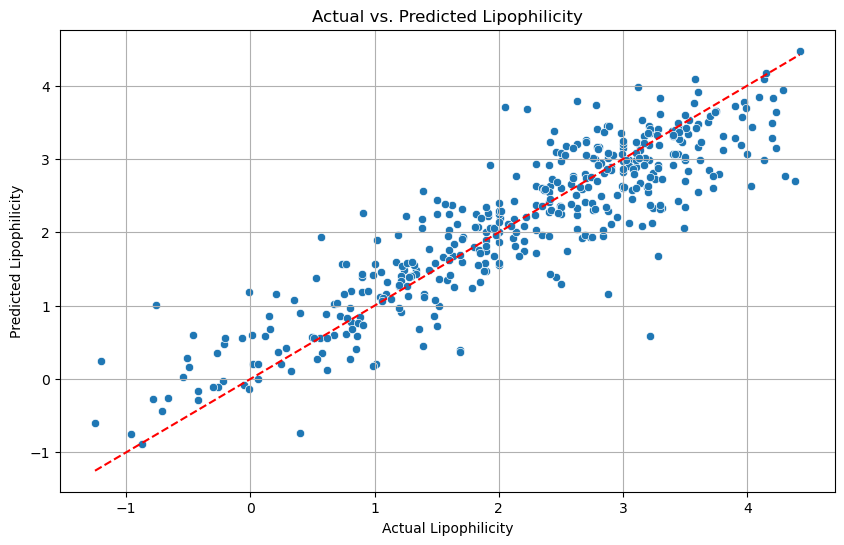

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=lipo_y_ensemble_test, y=lipo_lasso_pred)
plt.title('Actual vs. Predicted Lipophilicity')
plt.xlabel('Actual Lipophilicity')
plt.ylabel('Predicted Lipophilicity')
plt.plot([min(lipo_y_ensemble_test), max(lipo_y_ensemble_test)], [min(lipo_y_ensemble_test), max(lipo_y_ensemble_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.grid(True)
plt.show()


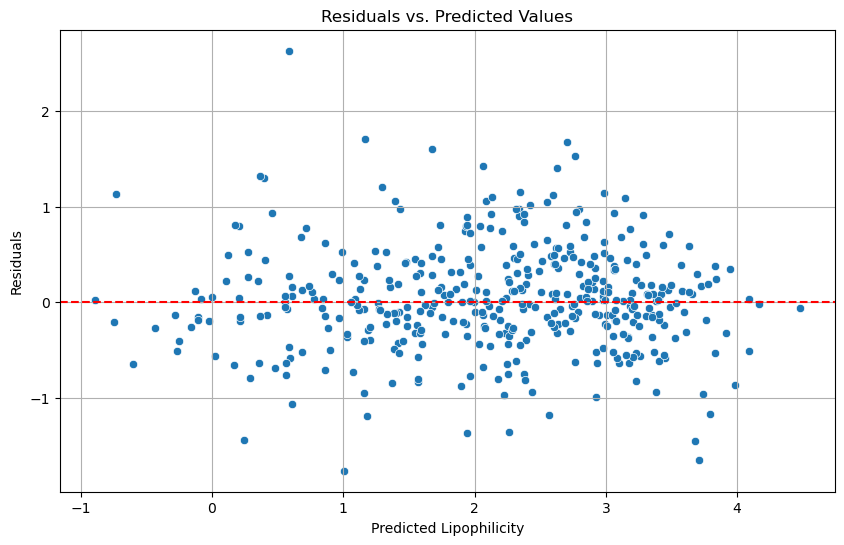

In [73]:
# Calculate residuals
residuals = lipo_y_ensemble_test - lipo_lasso_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=lipo_lasso_pred, y=residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Lipophilicity')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()


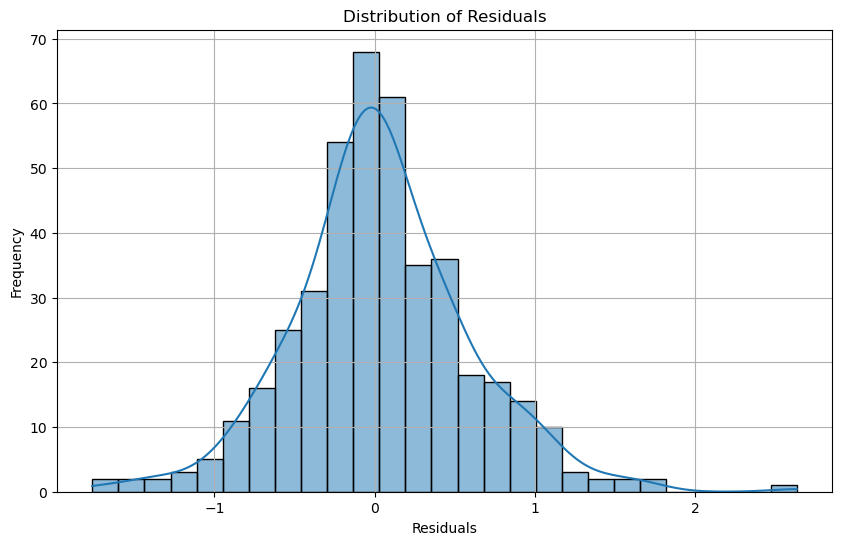

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


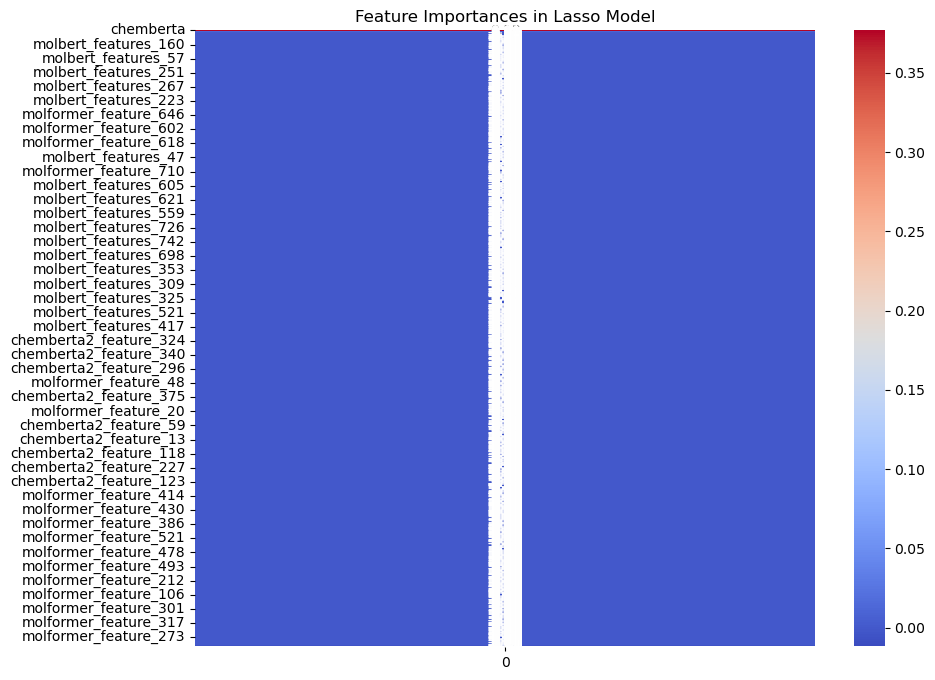

In [75]:
# Getting the coefficients
coefficients = pd.Series(lasso_cv.coef_, index=lipo_X_ensemble_valid2_scaled.columns)

plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(coefficients.sort_values(ascending=False)), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Importances in Lasso Model')
plt.show()


In [76]:
# elastic net
# Define the model with elasticnet penalty for regression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

elastic_net_model = ElasticNet(random_state=0, max_iter=5000)

# Define the hyperparameter grid
# Use fewer discrete values for alpha and l1_ratio
alphas = [0.01, 0.1, 1, 3]  # Reduced number of points focusing on lower and mid-range
l1_ratios = [0.1, 0.5, 0.9]  # Reduced to three points, emphasizing edges and midpoint

params = {
    'alpha': alphas,  # Convert alpha back to C
    'l1_ratio': l1_ratios
}

grid_search = GridSearchCV(elastic_net_model, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(lipo_X_ensemble_valid2_scaled, lipo_y_ensemble_valid2)

# Get the best hyperparameters
lipo_best_elastic_params = grid_search.best_params_
print(lipo_best_elastic_params)

# Initialize and train the best ElasticNet model
lipo_best_elastic_model = ElasticNet(alpha=lipo_best_elastic_params['alpha'], l1_ratio=lipo_best_elastic_params['l1_ratio'], random_state=0, max_iter=5000)
lipo_best_elastic_model.fit(lipo_X_ensemble_valid2_scaled, lipo_y_ensemble_valid2)

# Predict the test set
lipo_elastic_pred = lipo_best_elastic_model.predict(lipo_X_ensemble_test_scaled) * train_sd + train_mean

# Calculate the metrics
lipo_elastic_metrics = {
    "MAE": mean_absolute_error(lipo_y_ensemble_test, lipo_elastic_pred),
    "RMSE": np.sqrt(mean_squared_error(lipo_y_ensemble_test, lipo_elastic_pred)),
    "R2 Score": r2_score(lipo_y_ensemble_test, lipo_elastic_pred),
    "Correlation": pearsonr(lipo_y_ensemble_test, lipo_elastic_pred)[0]
}

lipo_elastic_metrics

{'alpha': 0.1, 'l1_ratio': 0.5}


{'MAE': 0.4137831844429741,
 'RMSE': 0.5568074066118127,
 'R2 Score': 0.7847902473755741,
 'Correlation': 0.8867435417194434}

In [77]:
# # use elastic net to select features
# coefs = pd.Series(lipo_best_elastic_model.coef_, index=lipo_X_ensemble_valid2.columns)

# selected_features = coefs[coefs != 0].index.tolist()
# lipo_X_ensemble_valid2_selected = lipo_X_ensemble_valid2[selected_features]
# lipo_X_ensemble_test_selected = lipo_X_ensemble_test[selected_features]

# print("Selected Features:", selected_features)
# print("Filtered Dataset Shape:", lipo_X_ensemble_valid2_selected.shape)

# # check how many features have Chemberta2, Molformer, Molbert
# selected_features = lipo_X_ensemble_valid2_selected.columns
# chemberta_count = sum('chemberta' in feature for feature in selected_features)
# molformer_count = sum('molformer' in feature for feature in selected_features)
# molbert_count = sum('molbert' in feature for feature in selected_features)

# print("Chemberta2 count:", chemberta_count)
# print("Molformer count:", molformer_count)
# print("Molbert count:", molbert_count)

In [78]:
# use lasso to select features
coefs = pd.Series(lasso_cv.coef_, index=lipo_X_ensemble_valid2.columns)

selected_features = coefs[coefs != 0].index.tolist()
lipo_X_ensemble_valid2_selected = lipo_X_ensemble_valid2[selected_features]
lipo_X_ensemble_test_selected = lipo_X_ensemble_test[selected_features]

print("Selected Features:", selected_features)
print("Filtered Dataset Shape:", lipo_X_ensemble_valid2_selected.shape)

# check how many features have Chemberta2, Molformer, Molbert
selected_features = lipo_X_ensemble_valid2_selected.columns
chemberta_count = sum('chemberta' in feature for feature in selected_features)
molformer_count = sum('molformer' in feature for feature in selected_features)
molbert_count = sum('molbert' in feature for feature in selected_features)

print("Chemberta2 count:", chemberta_count)
print("Molformer count:", molformer_count)
print("Molbert count:", molbert_count)

Selected Features: ['chemberta', 'molformer', 'molbert', 'chemberta2_feature_71', 'chemberta2_feature_125', 'molformer_feature_73', 'molformer_feature_135', 'molformer_feature_199', 'molformer_feature_540', 'molformer_feature_711', 'molbert_features_52', 'molbert_features_594']
Filtered Dataset Shape: (840, 12)
Chemberta2 count: 3
Molformer count: 6
Molbert count: 3


In [79]:
lipo_X_ensemble_valid2_selected = lipo_X_ensemble_valid2_scaled[selected_features]
lipo_X_ensemble_test_selected = lipo_X_ensemble_test_scaled[selected_features]

# check shapes
print(lipo_X_ensemble_valid2_selected.shape)
print(lipo_X_ensemble_test_selected.shape)

(840, 12)
(420, 12)


In [80]:
# Initialize and train the SVR model
from sklearn.svm import SVR

lipo_svr_model = SVR()
lipo_svr_model.fit(lipo_X_ensemble_valid2_selected, lipo_y_ensemble_valid2)

# Predict the test set
lipo_svr_pred = lipo_svr_model.predict(lipo_X_ensemble_test_selected) * train_sd + train_mean

# Calculate the metrics
lipo_svr_metrics = {
    "MAE": mean_absolute_error(lipo_y_ensemble_test, lipo_svr_pred ),
    "RMSE": np.sqrt(mean_squared_error(lipo_y_ensemble_test, lipo_svr_pred )),
    "R2 Score": r2_score(lipo_y_ensemble_test, lipo_svr_pred ),
    "Correlation": pearsonr(lipo_y_ensemble_test, lipo_svr_pred )[0]  # Only record the correlation coefficient
}

lipo_svr_metrics

{'MAE': 0.45646320998200385,
 'RMSE': 0.5990041301700805,
 'R2 Score': 0.750935646596741,
 'Correlation': 0.8670863461622995}

In [81]:
# initailize and use a 5-fold cross-validation to tune the hyperparameters of a random forest model for regression
from sklearn.ensemble import RandomForestRegressor

lipo_rf_model = RandomForestRegressor(random_state=0)

lipo_rf_model.fit(lipo_X_ensemble_valid2_selected, lipo_y_ensemble_valid2)

# Predict the test set
lipo_rf_best_pred = lipo_rf_model.predict(lipo_X_ensemble_test_selected) * train_sd + train_mean

# Calculate the metrics
lipo_rf_best_metrics = {
    "MAE": mean_absolute_error(lipo_y_ensemble_test, lipo_rf_best_pred),
    "RMSE": np.sqrt(mean_squared_error(lipo_y_ensemble_test, lipo_rf_best_pred)),
    "R2 Score": r2_score(lipo_y_ensemble_test, lipo_rf_best_pred),
    "Correlation": pearsonr(lipo_y_ensemble_test, lipo_rf_best_pred)[0]  # Only record the correlation coefficient
}

lipo_rf_best_metrics

{'MAE': 0.4403288095238096,
 'RMSE': 0.5929463270297702,
 'R2 Score': 0.7559478109294119,
 'Correlation': 0.8723890293802804}

In [82]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.early_stop import no_progress_loss

# Define the hyperparameter space using continuous distributions
lipo_xgb_hyperopt_space = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 50),
    'max_depth': hp.quniform('max_depth', 3, 7, 2),
    'learning_rate': hp.uniform('learning_rate', 0.001, 0.3),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0)
}

# Correctly define the RMSE scorer function
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Convert float outputs of hp.quniform to int for certain parameters
def objective(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    model = xgb.XGBRegressor(**params, random_state=0)
    
    # Cross-validated RMSE as the objective
    score = cross_val_score(model, lipo_X_ensemble_valid2_selected, lipo_y_ensemble_valid2, 
                            scoring=make_scorer(rmse_scorer, greater_is_better=False), cv=5)
    
    # Minimize the positive RMSE (already negative from scoring)
    return {'loss': -score.mean(), 'status': STATUS_OK}

# Run the Bayesian optimization
trials = Trials()
lipo_xgb_best_params = fmin(fn=objective, 
                            space=lipo_xgb_hyperopt_space, 
                            algo=tpe.suggest, 
                            max_evals=100, 
                            trials=trials,
                            early_stop_fn=no_progress_loss(10))

print("Best hyperparameters:", lipo_xgb_best_params)


 42%|████▏     | 42/100 [00:25<00:35,  1.63trial/s, best loss: 0.4871197766401879] 
Best hyperparameters: {'colsample_bytree': 0.5480065032800768, 'learning_rate': 0.019967160943045327, 'max_depth': 4.0, 'n_estimators': 200.0, 'subsample': 0.9037681547359749}


In [83]:
# fit the model with the best hyperparameters
# Convert parameters obtained from Hyperopt to the correct data type
lipo_xgb_best_params['n_estimators'] = int(lipo_xgb_best_params['n_estimators'])
lipo_xgb_best_params['max_depth'] = int(lipo_xgb_best_params['max_depth'])

# Initialize and train the XGBoost model with the best parameters
lipo_xgb_model = xgb.XGBRegressor(**lipo_xgb_best_params, random_state=0)
lipo_xgb_model.fit(lipo_X_ensemble_valid2_selected, lipo_y_ensemble_valid2)

# Predict the test set
lipo_xgb_best_pred = lipo_xgb_model.predict(lipo_X_ensemble_test_selected) * train_sd + train_mean

# Calculate the metrics
lipo_xgb_best_metrics = {
    "MAE": mean_absolute_error(lipo_y_ensemble_test, lipo_xgb_best_pred),
    "RMSE": np.sqrt(mean_squared_error(lipo_y_ensemble_test, lipo_xgb_best_pred)),
    "R2 Score": r2_score(lipo_y_ensemble_test, lipo_xgb_best_pred),
    "Correlation": pearsonr(lipo_y_ensemble_test, lipo_xgb_best_pred)[0]  # Only record the correlation coefficient
}

lipo_xgb_best_metrics

{'MAE': 0.4332553585938045,
 'RMSE': 0.570333046609423,
 'R2 Score': 0.7742077589538598,
 'Correlation': 0.8808012090283991}

In [84]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import mean_squared_error
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.early_stop import no_progress_loss

torch.manual_seed(0)

# Define RMSE loss
class RMSELoss(nn.Module):
    def __init__(self):
        super(RMSELoss, self).__init__()
        self.mse = nn.MSELoss()

    def forward(self, y_pred, y_true):
        return torch.sqrt(self.mse(y_pred, y_true))

# Define the neural network model for regression
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_layers, num_neurons, dropout_rate):
        super(SimpleNN, self).__init__()
        layers = [nn.Linear(input_size, num_neurons), nn.ReLU(), nn.Dropout(dropout_rate)]
        
        for _ in range(1, num_layers):
            layers += [nn.Linear(num_neurons, num_neurons), nn.ReLU(), nn.Dropout(dropout_rate)]
        
        layers += [nn.Linear(num_neurons, 1)]
        
        self.layers = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.layers(x)

# Hyperparameter space with hp.quniform for integer distribution
space = {
    'num_layers': hp.quniform('num_layers', 1, 5, 1),
    'num_neurons': hp.quniform('num_neurons', 16, 256, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.01)),
    'dropout_rate': hp.uniform('dropout_rate', 0.0, 0.5)
}

# Global dataset variables assumed to be defined externally
X = lipo_X_ensemble_valid2_selected
y = lipo_y_ensemble_valid2

# Objective function for Bayesian optimization
def objective(params):
    params['num_layers'] = int(params['num_layers'])  # Ensure num_layers is an integer
    params['num_neurons'] = int(params['num_neurons'])  # Ensure num_neurons is an integer
    kf = KFold(n_splits=5)
    rmse_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Convert DataFrame to numpy arrays before making them PyTorch tensors
        train_dataset = TensorDataset(torch.tensor(X_train.values.astype(np.float32)), 
                                      torch.tensor(y_train.values.astype(np.float32)).unsqueeze(1))
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

        model = SimpleNN(input_size=X_train.shape[1], num_layers=params['num_layers'],
                         num_neurons=params['num_neurons'], dropout_rate=params['dropout_rate'])
        criterion = RMSELoss()
        optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])

        model.train()
        for epoch in range(100):
            for inputs, targets in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()

        model.eval()
        with torch.no_grad():
            val_preds = model(torch.tensor(X_val.values.astype(np.float32))).squeeze(1)
            val_targets = torch.tensor(y_val.values.astype(np.float32))
            rmse = np.sqrt(mean_squared_error(val_targets.numpy(), val_preds.numpy()))
            rmse_scores.append(rmse)

    avg_rmse = np.mean(rmse_scores)
    return {'loss': avg_rmse, 'status': STATUS_OK} # Minimize RMSE

# Run Bayesian optimization
trials = Trials()
lipo_nn_best_params = fmin(fn=objective,
                           space=space,
                           algo=tpe.suggest,
                           max_evals=50,
                           trials=trials,
                           early_stop_fn=no_progress_loss(10))

print("Best hyperparameters:", lipo_nn_best_params)


 32%|███▏      | 16/50 [06:11<13:08, 23.20s/trial, best loss: 0.48012620210647583]
Best hyperparameters: {'dropout_rate': 0.1584755851357969, 'learning_rate': 0.00012457046267234882, 'num_layers': 5.0, 'num_neurons': 76.0}


In [85]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

torch.manual_seed(0)

# Define the neural network model again
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_layers, num_neurons, dropout_rate):
        super(SimpleNN, self).__init__()
        layers = [nn.Linear(input_size, num_neurons), nn.ReLU(), nn.Dropout(dropout_rate)]
        
        for _ in range(1, num_layers):
            layers += [nn.Linear(num_neurons, num_neurons), nn.ReLU(), nn.Dropout(dropout_rate)]
        
        layers += [nn.Linear(num_neurons, 1)]
        
        self.layers = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.layers(x)

# Define a function to compute RMSE
def compute_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Convert parameters to the correct format if necessary
lipo_nn_best_params = {
    'num_layers':  int(lipo_nn_best_params['num_layers']),  # Extracted from Bayesian optimization results
    'num_neurons':  int(lipo_nn_best_params['num_neurons']),  # Extracted from Bayesian optimization results
    'dropout_rate': lipo_nn_best_params['dropout_rate'],  # Extracted from Bayesian optimization results
    'learning_rate': lipo_nn_best_params['learning_rate']  # Extracted from Bayesian optimization results
}

# Prepare datasets
X_train_tensor = torch.tensor(lipo_X_ensemble_valid2_selected.values.astype(np.float32))
y_train_tensor = torch.tensor(lipo_y_ensemble_valid2.values.astype(np.float32)).unsqueeze(1)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

X_test_tensor = torch.tensor(lipo_X_ensemble_test_selected.values.astype(np.float32))
y_test_tensor = torch.tensor(lipo_y_ensemble_test.values.astype(np.float32)).unsqueeze(1)

# Initialize the model
model = SimpleNN(input_size=lipo_X_ensemble_valid2_selected.shape[1], num_layers=lipo_nn_best_params['num_layers'],
                         num_neurons=lipo_nn_best_params['num_neurons'], dropout_rate=lipo_nn_best_params['dropout_rate'])
criterion = RMSELoss()
optimizer = optim.Adam(model.parameters(), lr=lipo_nn_best_params['learning_rate'])

# Training loop
model.train()
for epoch in range(100):  # Number of epochs can be adjusted
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Evaluation on test set
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    predictions = outputs.squeeze(1).numpy() * train_sd + train_mean

    # Calculate metrics
    mae = mean_absolute_error(y_test_tensor.numpy(), predictions)
    rmse = compute_rmse(y_test_tensor.numpy(), predictions)
    r2 = r2_score(y_test_tensor.numpy(), predictions)
    correlation, _ = pearsonr(y_test_tensor.numpy().squeeze(1), predictions)

    lipo_nn_metrics = {
        'MAE': mae,
        'RMSE': rmse,
        'R2 Score': r2,
        'Correlation': correlation
    }

lipo_nn_metrics

{'MAE': 0.43340504,
 'RMSE': 0.57606965,
 'R2 Score': 0.7696427392815074,
 'Correlation': 0.8791402899177417}

In [86]:
# create a table to record all metrics for lipo
lipo_metrics_results["Elastic Net"] = lipo_elastic_metrics
lipo_metrics_results["LASSO"] = lipo_lasso_metrics
lipo_metrics_results["SVR"] = lipo_svr_metrics
lipo_metrics_results["Random Forest"] = lipo_rf_best_metrics
lipo_metrics_results["XGBoost"] = lipo_xgb_best_metrics
lipo_metrics_results["Neural Network"] = lipo_nn_metrics

lipo_metrics_df = pd.DataFrame(lipo_metrics_results).T
# keep 3 digits after the decimal point
lipo_metrics_df = lipo_metrics_df.round(3)

# export table to csv
lipo_metrics_df.to_csv('./split3_lipo_metrics_lassoFeatures.csv')